# Import software libraries and load the dataset

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))

# Load the dataset.
stores_df = pd.read_csv('../data/stores_data_full_clean.csv',
                        index_col = 0)
stores_df['Date'] = pd.to_datetime(stores_df['Date'])
print('\nLoaded dataset.')

# Format floats with comma in thousands place
pd.options.display.float_format = '{:,.2f}'.format

Libraries used in this project:
- Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.22.3
- pandas 1.4.3
- Matplotlib 3.5.1

Loaded dataset.


# Generate revenue line plots using a built-in style

In [2]:
jan = stores_df[stores_df['Date'].dt.month == 1]
feb = stores_df[stores_df['Date'].dt.month == 2]

jan_rev = stores_df.groupby(jan['Date'].dt.day)['Revenue'].sum()
feb_rev = stores_df.groupby(feb['Date'].dt.day)['Revenue'].sum()

jan_rev.head()

Date
1.00   4,519.22
2.00   1,852.86
3.00   1,979.17
4.00   1,546.37
5.00   3,368.27
Name: Revenue, dtype: float64

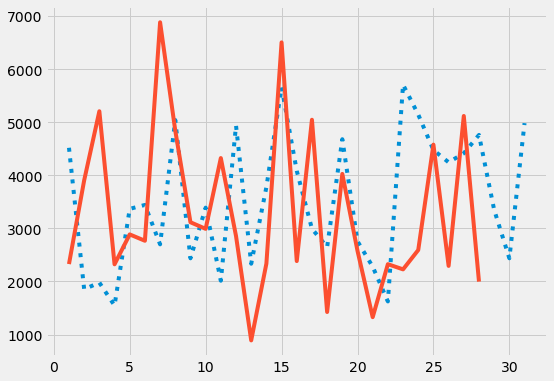

In [3]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(jan_rev.index, jan_rev, linestyle = ':', label = 'January')
ax.plot(feb_rev.index, feb_rev, label = 'February')

# Add a legend, title, and axis labels to the plot

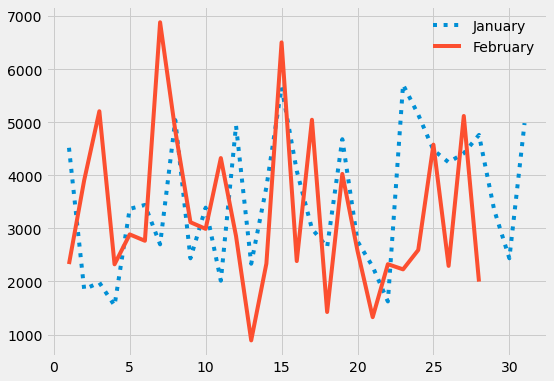

In [4]:
ax.legend(frameon = False)
fig

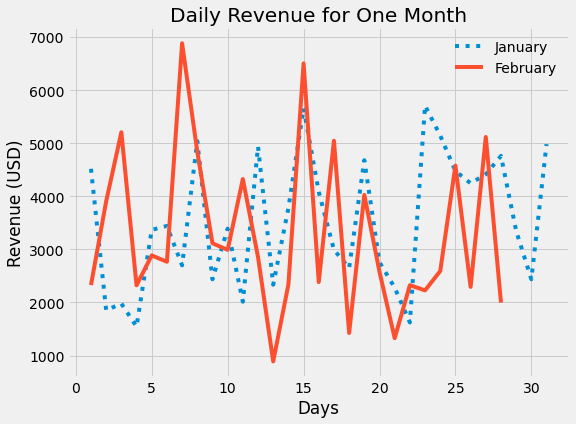

In [5]:
ax.set(title = 'Daily Revenue for One Month',
       xlabel = 'Days', ylabel = 'Revenue (USD)')
fig

# Change axis limits and modify axis ticks

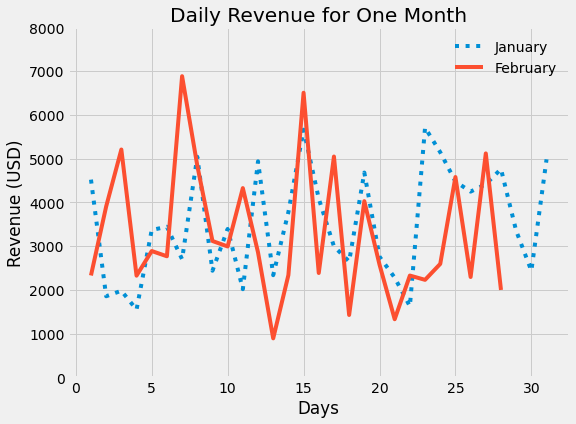

In [6]:
ax.set_ylim(bottom = 0, top = 8000)
fig

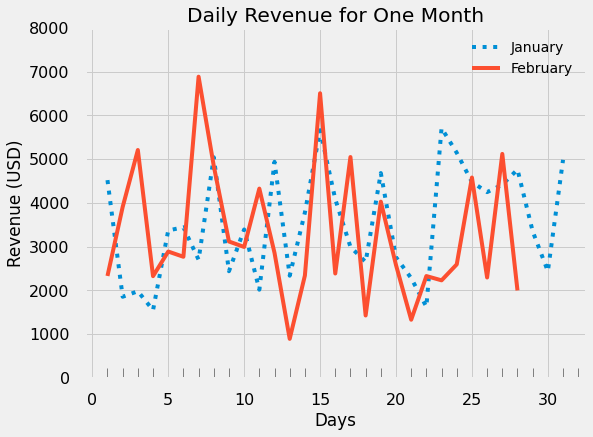

In [7]:
from matplotlib.ticker import AutoMinorLocator

ax.tick_params(axis = 'both', pad = 15, labelsize = 16)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = 'x', which = 'minor', direction = 'in',
               length = 10, width = 1, color = 'grey')
fig

# Add an annotation explaining that a particularly sharp drop in revenue was caused by a snowstorm in the region

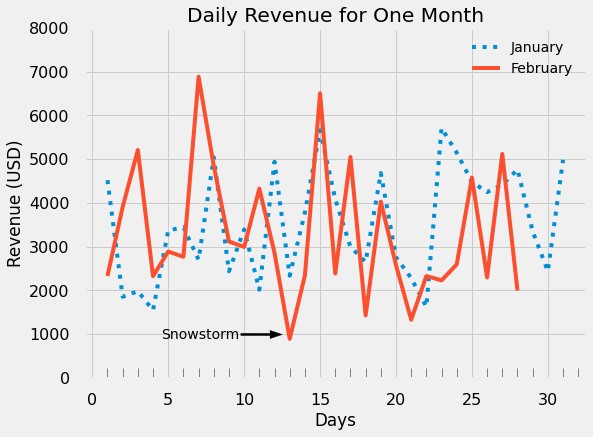

In [8]:
arrow_format = {'color': 'black', 'width': 2, 'headwidth': 8}
ax.annotate('Snowstorm', xy = (12.5, 990), xytext = (4.5, 900),
            arrowprops = arrow_format, color = 'black')
fig

# Generate scatter plots of unit price and gross income, in which each plot is color mapped to COGS, quantity, or customer rating

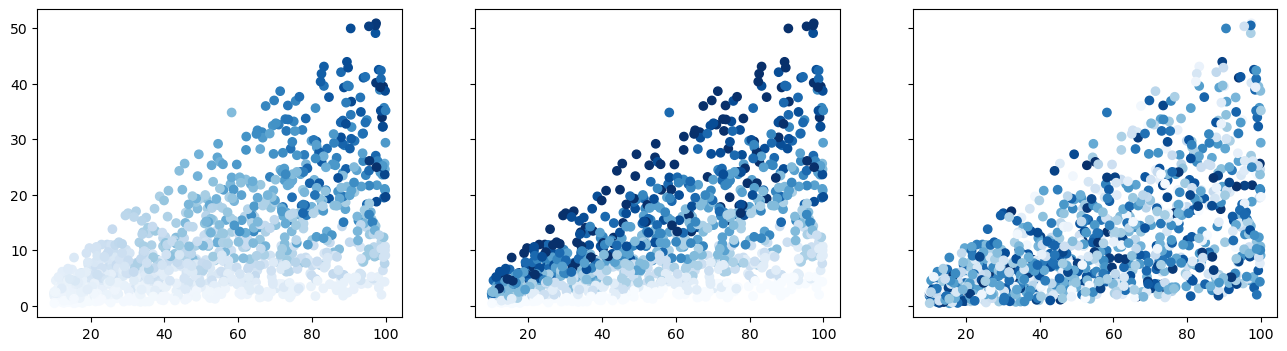

In [9]:
x = stores_df['UnitPrice']
y = stores_df['GrossIncome']
cmap = 'Blues'

plt.style.use('default')
fig, ax = plt.subplots(1, 3, sharey = 'row', figsize = (16, 4))
plot1 = ax[0].scatter(x, y, c = stores_df['COGS'], cmap = cmap)
plot2 = ax[1].scatter(x, y, c = stores_df['Quantity'], cmap = cmap)
plot3 = ax[2].scatter(x, y, c = stores_df['CustomerRating'], cmap = cmap)

# Assign color bars to each axis in the figure

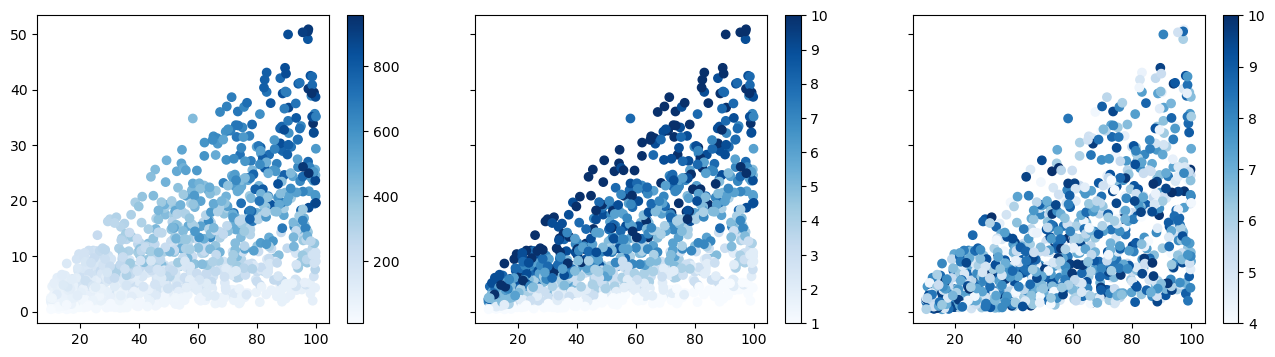

In [10]:
fig.colorbar(plot1, ax = ax[0])
fig.colorbar(plot2, ax = ax[1])
fig.colorbar(plot3, ax = ax[2])
fig

# Add titles and axis labels, and format text

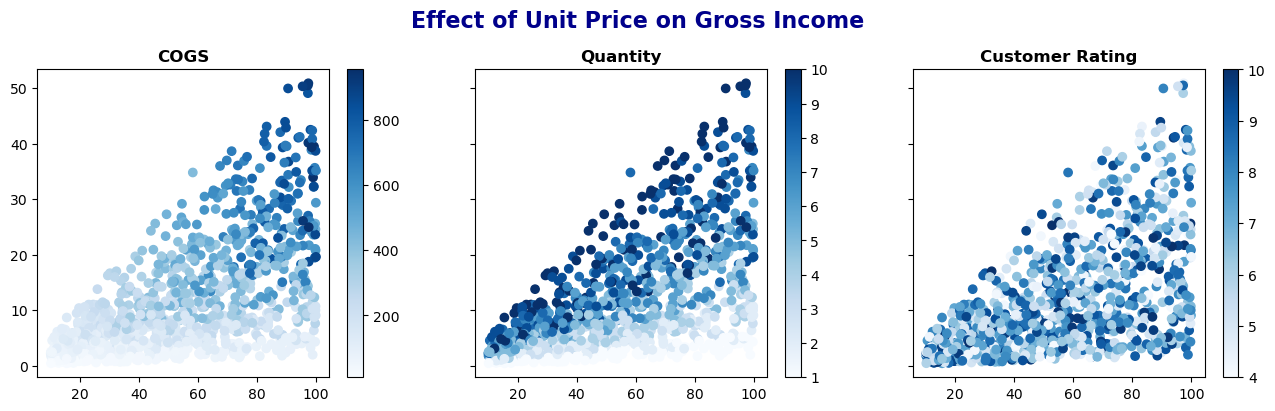

In [11]:
ax[0].set_title('COGS', weight = 'bold')
ax[1].set_title('Quantity', weight = 'bold')
ax[2].set_title('Customer Rating', weight = 'bold')
fig.suptitle('Effect of Unit Price on Gross Income', size = 16,
             weight = 'bold', c = 'darkblue', y = 1.03)
fig

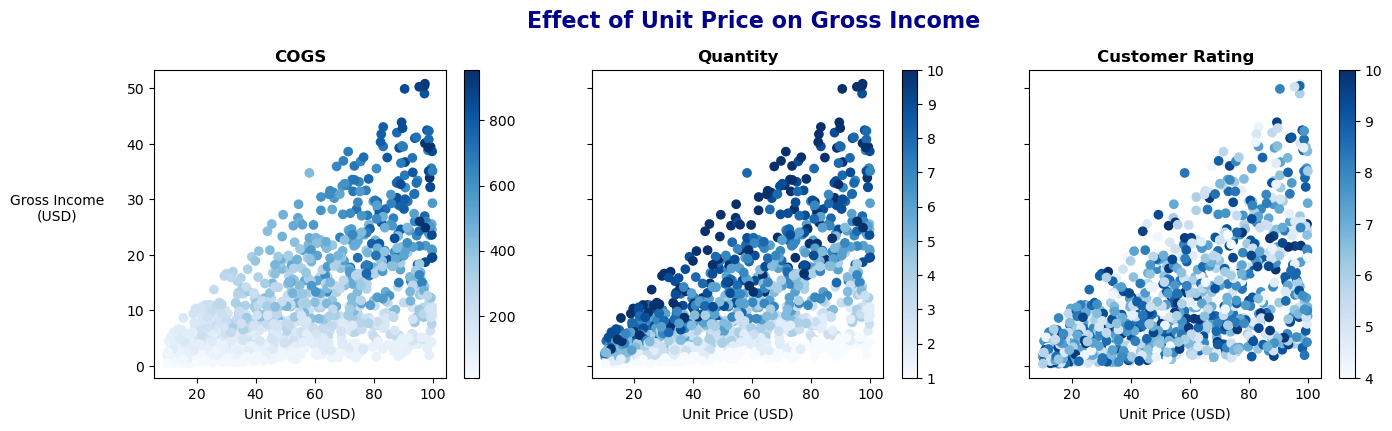

In [16]:
for i in range(0, 3):
    ax[i].set_xlabel('Unit Price (USD)')
    
ax[0].set_ylabel('Gross Income\n(USD)', labelpad = 50,
                 rotation = 'horizontal')
fig